In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# ALL MODULES
import pandas as pd
import nltk as nl 
import re
!pip install contractions
!pip install emoji --upgrade
from emoji import demojize
import contractions
from typing import List

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Step 1 - Merge all csv files** 
- merge csv files using pandas
- drop all columns except column
- turn object into a pandas dataframe

In [63]:
# merging all csv files
files =  ['/content/drive/MyDrive/XMP Preprocessing/AAAJ AAJC Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/AILANational Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/BAJItweet Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/BreitbartNews Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/FAIRImmigration Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/ICEgov Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/IngrahamAngle Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/StatePRM Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/TuckerCarlson Cleaned - Final.csv',
                      '/content/drive/MyDrive/XMP Preprocessing/UNHCRUSA Cleaned - Final.csv', 
                      '/content/drive/MyDrive/XMP Preprocessing/splcenter Cleaned - Final.csv'] 

df = pd.concat(
    map(pd.read_csv, files), ignore_index=True)
df = df['Content']
df = df.to_frame()

In [64]:
print(df.head(20))

                                              Content
0   -16,000 Southeast Asian Americans have receive...
1   .@AALDEF’s Jerry Vattamala on how to combat vo...
2   .@ActToChange, an org focused on addressing bu...
3   .@CAIRNational’s @NihadAwad emphasizes that Pr...
4   .@CaryChow_, our master of ceremonies, kicks o...
5   .@CaryChow_: “This is an organization that we ...
6   .@CaryChow: “The American Courage Awards honor...
7   .@defineamerican, @staymacro, @colorofchange, ...
8   .@DefineAmerican's new video series is spreadi...
9   .@gabriellexgem of @GeorgetownCPT highlights i...
10  .@HouseJudiciary is marking up the #NOBANAct t...
11  .@IAmAmnaNawaz to @governorcalvo: Why are you ...
12  .@IlhanMN delivering powerful remarks during t...
13  .@JoeBiden says he will give small businesses ...
14  .@johncyangdc notes that if you are able to, b...
15  .@johncyangdc says there are dangerous consequ...
16  .@johncyangdc: “A new dawn requires all of us ...
17  .@johncyangdc: “Nothing 

# **Step 2: Clean corpus with regular expressions**
- remove spaces
- remove urls
- remove numbers
- remove handles
- remove emojis

In [65]:
def preprocess_tweet(tweet: str) -> str:
    """
    Performs Twitter-specific pre-processing steps.
    We do not remove punctuation right now because that would remove hashtags.
    """

    space_regex = r'\s+'
    url_regex = r"\w+:\/\/\S+"
    space_regex = r'\s+'
    number_regex = r'\d+'
    # handle_regex = r"@[\w\d_]+"
    handle_regex = r"@[\S]+" # matches all characters except whitespace
    
    
    # replace long whitespace with single space
    cleaned_tweet = re.sub(space_regex, ' ', tweet)
    cleaned_tweet = re.sub(url_regex, '', cleaned_tweet)  # remove urls
    # remove user handles
    cleaned_tweet = re.sub(handle_regex, '', cleaned_tweet)
    cleaned_tweet = re.sub(number_regex, '', cleaned_tweet)  # remove numbers
    cleaned_tweet = demojize(cleaned_tweet)       # demojize

    cleaned_tweet = contractions.fix(cleaned_tweet).lower()
    return cleaned_tweet

In [66]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
for index, row in df.iterrows():
  df.at[index,'Content']=preprocess_tweet(row["Content"])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [67]:
print(df.head(30))

                                              Content
0   -, southeast asian americans have received fin...
1   . jerry vattamala on how to combat voter suppr...
2   . an org focused on addressing bullying in the...
3   .  emphasizes that president trump was clear t...
4   . our master of ceremonies, kicks off tonight’...
5   . “this is an organization that we need now mo...
6   . “the american courage awards honor living le...
7            .     +  are partnering to bring you t… 
8   . new video series is spreading good news! the...
9   . of  highlights in  that the increasing sophi...
10  . is marking up the #nobanact this morning whi...
11  . to  why are you here [at #aapitownhall] inst...
12  . delivering powerful remarks during the #repe...
13  . says he will give small businesses a restart...
14  . notes that if you are able to, bystander int...
15  . says there are dangerous consequences for as...
16  . “a new dawn requires all of us as informed c...
17  . “nothing is possible w

# **Step 3: Tokenize Tweets**
- tokenize tweets using tweet tokenizer
- lemmatize 


In [68]:
def tokenize(tweet: str, method: str = "tweet") -> List[str]:
    """
    Returns tokens of a tweet, tokenized using a specified method, with all the tokens stemmed.
    tweet is a string
    method is a string
    """

    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import TweetTokenizer, word_tokenize
    from nltk.stem import PorterStemmer
    import emoji
    import string
      
    lemmatizer = WordNetLemmatizer()

    tokens = []
    if method == "tweet":
        tweet_tokenizer = TweetTokenizer()
        tokens = tweet_tokenizer.tokenize(tweet)
    elif method == "word":
        tokens = word_tokenize(tweet)

    # remove tokens that are just punctuation

    # ***TODO: append other excluded ASCII values to string.punctuation***
    punctuation_list = [punct for punct in string.punctuation]
    punctuation_list.append(['’', '“'])
    tokens_punctuation_removed = [
        t for t in tokens if t not in punctuation_list]
        
    # remove emojis
    # tokens_emojis_removed = [
    #     t for t in tokens_punctuation_removed if t not in emoji.UNICODE_EMOJI]

    # uncomment to perform stemming
    # return [PorterStemmer().stem(t) for t in tokens_punctuation_removed]

    return [lemmatizer.lemmatize(w) for w in tokens_punctuation_removed]

In [69]:
for index, row in df.iterrows():
  df.at[index,'Content']=tokenize(row["Content"])

In [70]:
print(df.head(20))

                                              Content
0   [southeast, asian, american, have, received, f...
1   [jerry, vattamala, on, how, to, combat, voter,...
2   [an, org, focused, on, addressing, bullying, i...
3   [emphasizes, that, president, trump, wa, clear...
4   [our, master, of, ceremony, kick, off, tonight...
5   [“, this, is, an, organization, that, we, need...
6   [“, the, american, courage, award, honor, livi...
7             [are, partnering, to, bring, you, t, …]
8   [new, video, series, is, spreading, good, news...
9   [of, highlight, in, that, the, increasing, sop...
10  [is, marking, up, the, #nobanact, this, mornin...
11  [to, why, are, you, here, at, #aapitownhall, i...
12  [delivering, powerful, remark, during, the, #r...
13  [say, he, will, give, small, business, a, rest...
14  [note, that, if, you, are, able, to, bystander...
15  [say, there, are, dangerous, consequence, for,...
16  [“, a, new, dawn, requires, all, of, u, a, inf...
17  [“, nothing, is, possibl

# **Step 4: Remove apostrophes with Regular expressions**
- note: initially handles were of the form '@akin's', so removing handles
left us with "'s", now remove apostrophe leaves us with just "S", is this import
ant enough to affect our model?

In [81]:
def remove_apostrophe(tweet):
  special_character_regex = r'[^\w ]'
  cleaned = ''
  result = []
  if tweet:
    for word in tweet:
      cleaned =  re.sub(special_character_regex, '', word)
      # if cleaned == 's':
      #   cleaned = ''
      if len(cleaned) != 0:
        result.append(cleaned)
    return result


In [82]:
for index, row in df.iterrows():
  df.at[index,'Content']=remove_apostrophe(row["Content"])

In [83]:
print(df.head(10))

                                             Content
0  [southeast, asian, american, have, received, f...
1  [jerry, vattamala, on, how, to, combat, voter,...
2  [an, org, focused, on, addressing, bullying, i...
3  [emphasizes, that, president, trump, wa, clear...
4  [our, master, of, ceremony, kick, off, tonight...
5  [this, is, an, organization, that, we, need, n...
6  [the, american, courage, award, honor, living,...
7               [are, partnering, to, bring, you, t]
8  [new, video, series, is, spreading, good, news...
9  [of, highlight, in, that, the, increasing, sop...


In [84]:
# Remove Null values
df.fillna("", inplace = True)

## **Step 5: Vectorization**

In [85]:
from gensim.models import Word2Vec

df_to_list = df['Content'].values.tolist()
model = Word2Vec(df_to_list, min_count=1)
words = list(model.wv.vocab)
model.save('model.bin')


In [86]:
print(words[:5])

['southeast', 'asian', 'american', 'have', 'received']


In [87]:
# Vector for one word. 
print(model['southeast'])

[ 1.62197530e-01  2.99967509e-02  8.01915303e-02 -1.84992850e-01
  1.52879372e-01  1.46462783e-01  1.78950801e-01 -2.77674454e-03
 -1.16996653e-01  2.10370034e-01 -1.32246828e-02 -4.76248637e-02
 -1.09977446e-01 -1.83286279e-01 -1.08680181e-01 -3.92990299e-02
  2.87073385e-02  9.07207001e-03  1.02128768e-02 -8.56663361e-02
  1.89500734e-01  4.53253789e-03  1.48733318e-01 -5.21294326e-02
  3.75941545e-02  8.72624889e-02  2.37064809e-01  9.13538933e-02
 -2.22490534e-01 -6.00189320e-04  8.33612978e-02  3.28411236e-02
 -1.60499156e-01 -2.81124599e-02  1.34038553e-01  9.90708843e-02
 -1.01821765e-01 -1.21854454e-01 -1.71489287e-02 -3.43834050e-02
  1.80137411e-01 -7.56904259e-02 -6.69967458e-02 -1.98585778e-01
  4.49130051e-02 -7.82805085e-02  1.62760820e-02 -2.40153708e-02
  2.21939221e-01  6.95375055e-02  2.32298180e-01  2.35306799e-01
 -1.52346420e-05 -1.14239328e-01  7.47065339e-03  5.48920818e-02
  2.37045243e-01 -2.42370382e-01  3.18573788e-02  6.41127825e-02
  3.71848866e-02  5.80401

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = model[model.wv.vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


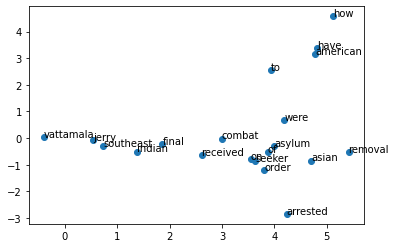

In [89]:
# Create Scatter plot to visualize words
plt.scatter(result[:20, 0], result[:20, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[:20]):
  plt.annotate(word, xy=(result[i, 0], result[i,1]))
plt.show()

In [90]:
# Pickle dataframe
df.to_pickle('/content/drive/MyDrive/XMP Preprocessing/cleaned_data.pkl')